In [1]:
import pandas as pd

df = pd.read_csv('../data/benin-malanville.csv')
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [2]:
df.describe()
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [ ]:
# since the comments is 100% empty
df.drop(columns=['Comments'], inplace=True)


In [5]:
from scipy.stats import zscore
import numpy as np

# Columns to check for outliers
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores
z_scores = np.abs(df[columns_to_check].apply(zscore))

# Flag rows where any column has a Z-score > 3
outliers = (z_scores > 3).any(axis=1)

# Count and preview
print(f"Number of outlier rows: {outliers.sum()}")
df_outliers = df[outliers]
df_outliers.head()


Number of outlier rows: 7740


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
670,2021-08-09 11:11,836.0,235.0,610.6,778.8,783.8,30.3,68.2,3.2,4.1,0.7,190.5,18.4,999,0,0.0,63.0,52.7
671,2021-08-09 11:12,1274.0,698.8,615.2,1210.3,1210.3,30.1,69.6,3.4,4.1,0.6,175.8,13.3,999,0,0.0,63.7,53.1
672,2021-08-09 11:13,938.0,340.1,612.8,891.1,891.1,30.4,68.4,3.4,4.6,0.9,171.5,11.9,999,0,0.0,65.8,54.3
673,2021-08-09 11:14,718.5,126.8,593.2,682.6,682.6,30.6,68.2,4.7,5.6,0.6,160.7,8.0,999,0,0.0,65.4,54.2
674,2021-08-09 11:15,1349.0,771.8,618.0,1281.5,1281.5,30.9,67.1,4.0,4.6,0.4,169.1,12.3,999,0,0.0,65.0,53.5


In [6]:
df_clean = df[~outliers].copy()


In [10]:
import os
os.getcwd()

'c:\\Users\\bigid\\Code\\Kifya\\solar-challenge-week1\\notebooks'

In [13]:
os.makedirs("data", exist_ok=True)
df_clean.to_csv("../data/benin_clean.csv", index=False)


In [ ]:
import os
print(os.getcwd())

c:\Users\bigid\Code\Kifya\solar-challenge-week1\notebooks


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [16]:
df = pd.read_csv("../data/benin_clean.csv")


In [17]:
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517860 entries, 0 to 517859
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      517860 non-null  object 
 1   GHI            517860 non-null  float64
 2   DNI            517860 non-null  float64
 3   DHI            517860 non-null  float64
 4   ModA           517860 non-null  float64
 5   ModB           517860 non-null  float64
 6   Tamb           517860 non-null  float64
 7   RH             517860 non-null  float64
 8   WS             517860 non-null  float64
 9   WSgust         517860 non-null  float64
 10  WSstdev        517860 non-null  float64
 11  WD             517860 non-null  float64
 12  WDstdev        517860 non-null  float64
 13  BP             517860 non-null  int64  
 14  Cleaning       517860 non-null  int64  
 15  Precipitation  517860 non-null  float64
 16  TModA          517860 non-null  float64
 17  TModB          517860 non-nul

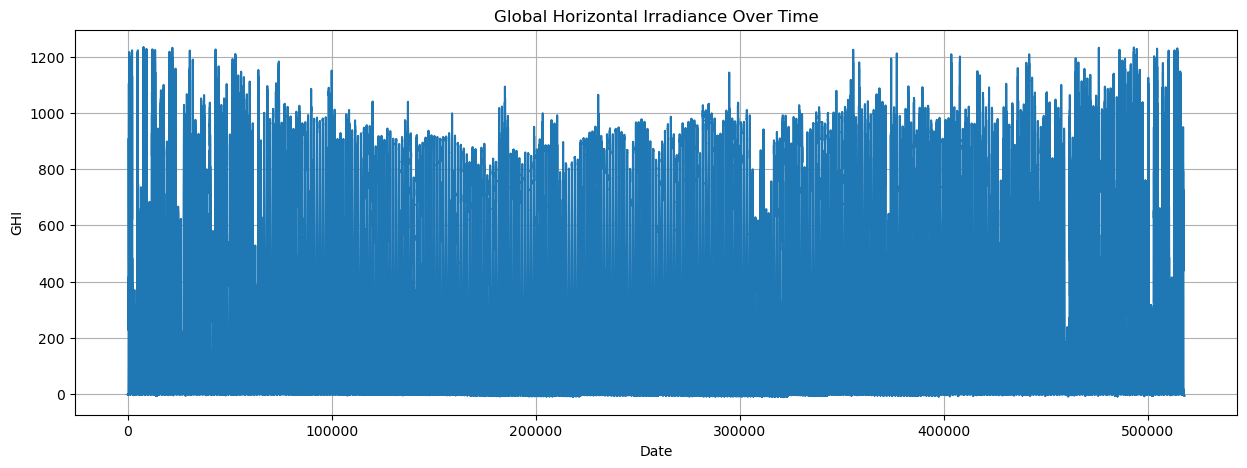

In [18]:
df['GHI'].plot(figsize=(15, 5), title='Global Horizontal Irradiance Over Time')
plt.xlabel("Date")
plt.ylabel("GHI")
plt.grid(True)
plt.show()


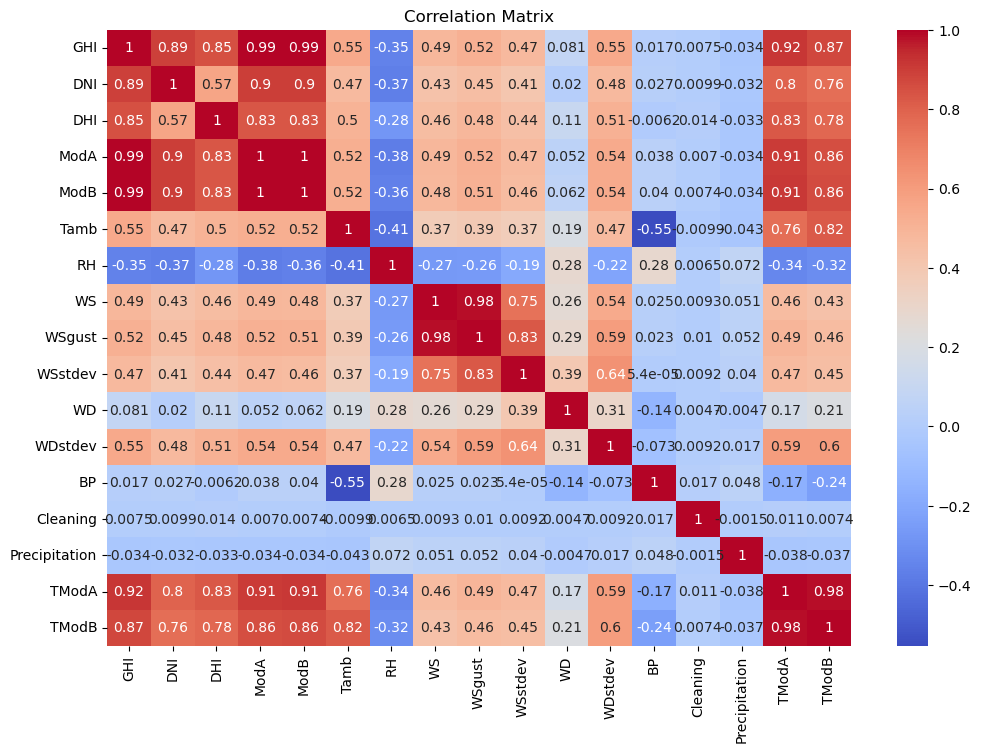

In [20]:
plt.figure(figsize=(12, 8))

# Use only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title("Correlation Matrix")
plt.show()


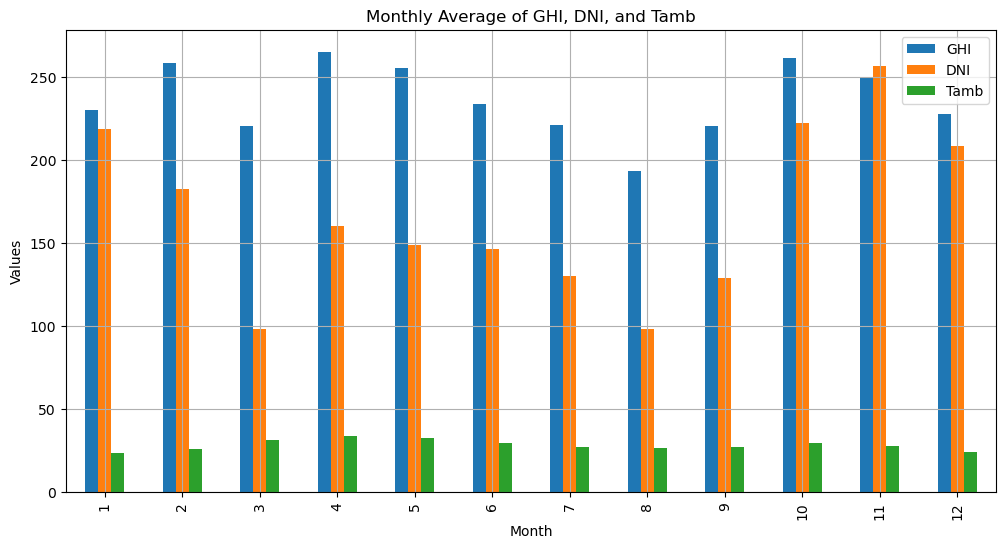

In [22]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'])


df['Month'] = df['Timestamp'].dt.month


monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'Tamb']].mean()


monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Average of GHI, DNI, and Tamb')
plt.ylabel('Values')
plt.xlabel('Month')
plt.grid(True)
plt.show()


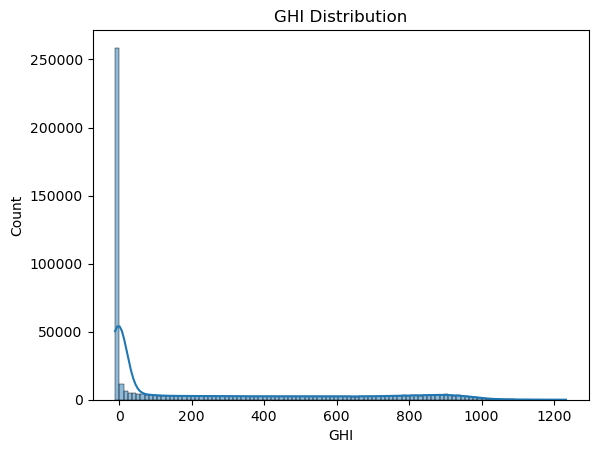

In [23]:
sns.histplot(df['GHI'], kde=True)
plt.title('GHI Distribution')
plt.show()


In [24]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)


<Figure size 1500x500 with 0 Axes>

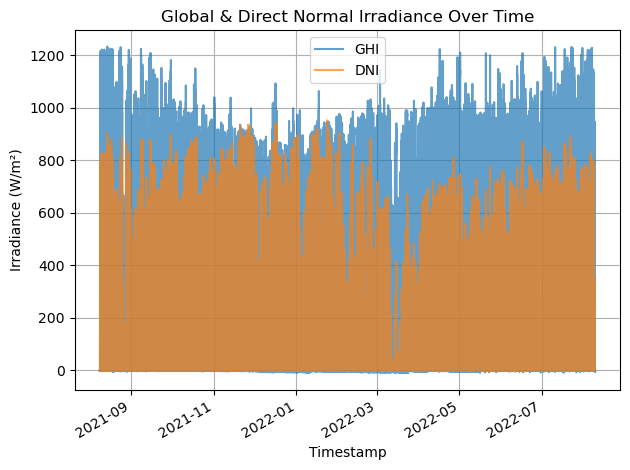

In [25]:
plt.figure(figsize=(15, 5))
df[['GHI', 'DNI']].plot(alpha=0.7)
plt.title('Global & Direct Normal Irradiance Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


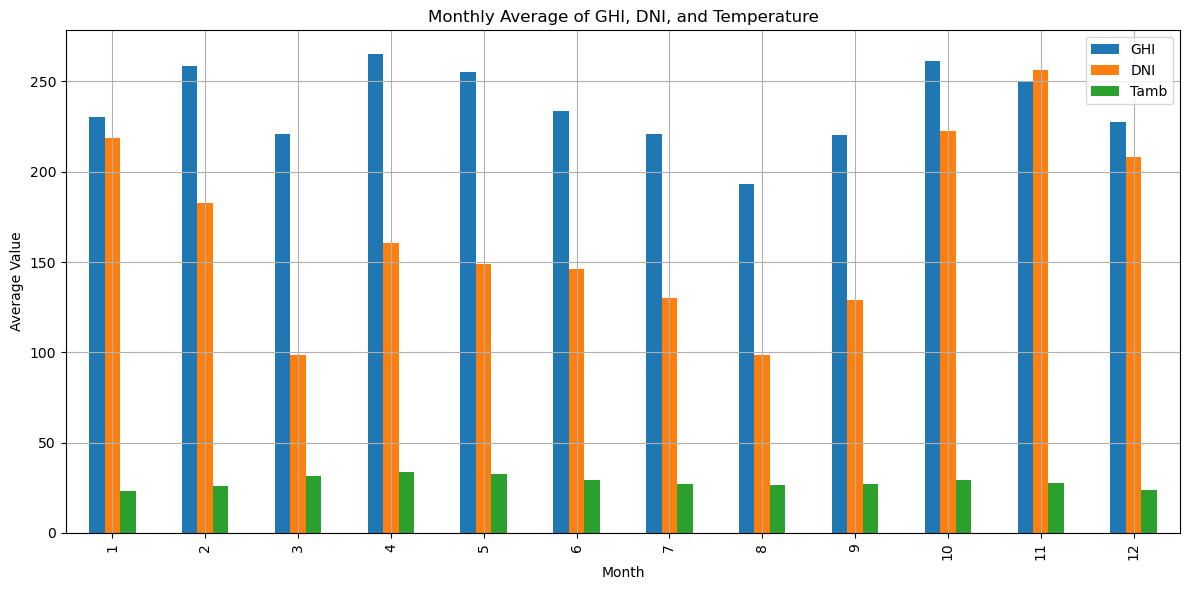

In [26]:
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'Tamb']].mean()

monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Average of GHI, DNI, and Temperature')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.grid(True)
plt.tight_layout()
plt.show()
